# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import os
import cv2
import time
import zipfile
import tensorflow as tf
import imutils
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow. keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# 02. Extract the ZIP file

In [2]:
zip_file = "/content/Brain Tumor Dataset 500.zip"

# Extract ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("Brain Tumor Dataset")

# 03. Define the base path for the dataset

In [3]:
base_path = "/content/Brain Tumor Dataset/Brain Tumor Dataset 500"

# List of tumor types (matching the folder names)

tumor_types = ["Glioma", "Meningioma", "Pituitary", "Notumor"]

# Function to count the number of files in each subfolder

def count_files(base_path):
    for tumor_type in tumor_types:
        folder_path = os.path.join(base_path, tumor_type)
        if os.path.exists(folder_path):
            file_list = os.listdir(folder_path)
            number_files = len(file_list)
            print(f"Number of files in {tumor_type}: {number_files}")
        else:
            print(f"Folder for {tumor_type} does not exist in the specified path.")

# Perform EDA on the dataset

print("Brain Tumor MRI Dataset EDA")
count_files(base_path)

Brain Tumor MRI Dataset EDA
Number of files in Glioma: 500
Number of files in Meningioma: 500
Number of files in Pituitary: 500
Number of files in Notumor: 500


# 04. Data Augmentation

In [4]:
# Function to track the time taken

def timing(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int(sec_elapsed % (60 * 60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

# Function to augment data

def augmented_data(base_dir, n_generated_samples, save_base_dir):
    tumor_types = ["Glioma", "Meningioma", "Pituitary", "Notumor"]

    # Initialize ImageDataGenerator with the given

    data_gen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        brightness_range=(0.3, 1.0),
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    start_time = time.time()  # Start the timer

    # Iterate through each tumor type folder

    for tumor_type in tumor_types:
        # Define the source and destination paths

        source_dir = os.path.join(base_dir, tumor_type)
        save_dir = os.path.join(save_base_dir, tumor_type)

        # Create the save directory if it doesn't exist

        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        # Iterate through files in each tumor type folder

        for filename in os.listdir(source_dir):
            # Read the image
            image = cv2.imread(os.path.join(source_dir, filename))
            image = image.reshape((1,) + image.shape)  # Reshape to add batch dimension

            # Prefix for saving augmented images

            save_prefix = 'aug_' + filename[:-4]
            i = 0

            # Generate augmented images using the flow method

            for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_dir, save_prefix=save_prefix, save_format="jpg"):
                i += 1
                if i >= n_generated_samples:
                    break

    end_time = time.time()
    sec_elapsed = end_time - start_time
    print(f"Data augmentation completed in: {timing(sec_elapsed)}")

# Calling the function with the new configuration

base_dir = '/content/Brain Tumor Dataset/Brain Tumor Dataset 500'
n_generated_samples = 5
save_base_dir = '/content/Augmented Data'

augmented_data(base_dir, n_generated_samples, save_base_dir)

Data augmentation completed in: 0:9:21.40605854988098


# 05. Rename Augmented Data set MRI Images

In [5]:
# Rename All Glioma Tumor Images

folder = '/content/Augmented Data/Glioma/'
count = 1

for filename in os.listdir (folder):
    source = folder + filename
    destination = folder + "Glioma_" +str(count)+".jpg"
    os.rename (source, destination)
    count+=1
print("Glioma Tumor Images Are Rename Sucsessfully.")

# Rename All Meningioma Tumor Images

folder = '/content/Augmented Data/Meningioma/'
count = 1

for filename in os.listdir (folder):
    source = folder + filename
    destination = folder + "Meningioma_" +str(count)+".jpg"
    os.rename (source, destination)
    count+=1
print("Meningioma Tumor Images Are Rename Sucsessfully.")

# Rename All Pituitary Tumor Images

folder = '/content/Augmented Data/Pituitary/'
count = 1

for filename in os.listdir (folder):
    source = folder + filename
    destination = folder + "Pituitary_" +str(count)+".jpg"
    os.rename (source, destination)
    count+=1
print("Pituitary Tumor Images Are Rename Sucsessfully.")

# Rename All NoTumor Images

folder = '/content/Augmented Data/Notumor/'
count = 1

for filename in os.listdir (folder):
    source = folder + filename
    destination = folder + "Notumor_" +str(count)+".jpg"
    os.rename (source, destination)
    count+=1
print("NoTumor Tumor Images Are Rename Sucsessfully.")

Glioma Tumor Images Are Rename Sucsessfully.
Meningioma Tumor Images Are Rename Sucsessfully.
Pituitary Tumor Images Are Rename Sucsessfully.
NoTumor Tumor Images Are Rename Sucsessfully.


# 06. Plot

Tumor type counts (Augmented Data): [2500, 2500, 2500, 2500]


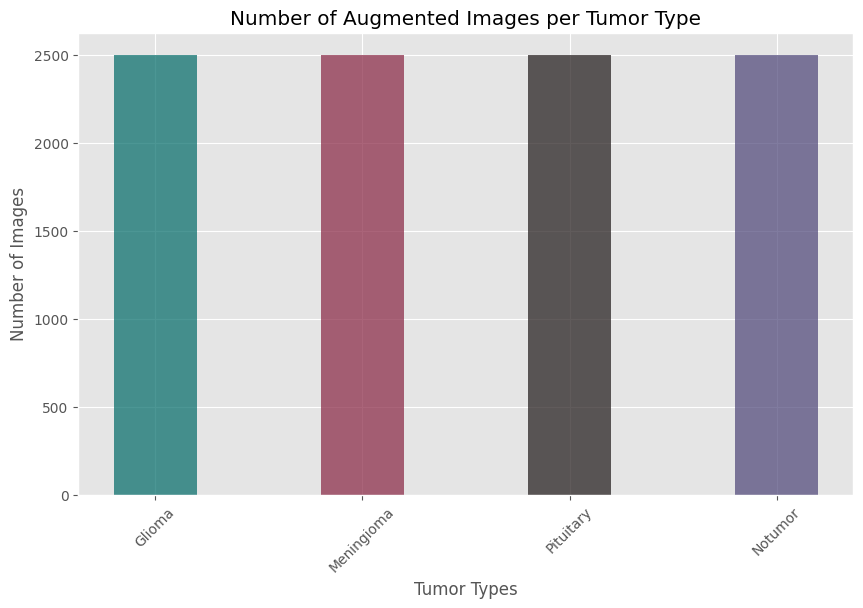

In [7]:
# Define the path for the augmented dataset

base_path = "/content/Augmented Data"

# List of tumor types (matching the folder names)

tumor_types = ["Glioma", "Meningioma", "Pituitary", "Notumor"]

# Count files in each tumor type folder

tumor_counts = [len(os.listdir(os.path.join(base_path, tumor))) for tumor in tumor_types]
print("Tumor type counts (Augmented Data):", tumor_counts)

# Define colors for each tumor type

colors = ['#006A67', '#872341', '#1D1616', '#4B4376']

# Plotting with distinct colors for each tumor type

x = np.arange(len(tumor_types))
width = 0.4

# Plot the counts using different colors for each tumor type

plt.figure(figsize=(10, 6))
plt.bar(x, tumor_counts, width=width, align='center', alpha=0.7, color=colors)

plt.xlabel('Tumor Types')
plt.ylabel('Number of Images')
plt.title('Number of Augmented Images per Tumor Type')
plt.xticks(x, tumor_types, rotation=45)
plt.show()

# 07. Crop Images

In [8]:
def crop_brain_tumor(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)

    # Find contours
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    if len(cnts) == 0:
        return image  # Return original if no contours found

    # Find the largest contour
    c = max(cnts, key=cv2.contourArea)

    # Find extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # Crop the region of interest
    cropped_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    return cropped_image

def crop_and_save_images(folder_path):
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        if image is not None:
            cropped_image = crop_brain_tumor(image)  # Crop image without resizing

            cv2.imwrite(image_path, cropped_image)  # Save the processed (cropped) image
            print(f"Processed: {filename}")
        else:
            print(f"Failed to read: {filename}")

# Apply preprocessing to all tumor images
tumor_types = ['Glioma', 'Meningioma', 'Pituitary', 'Notumor']
augmented_data_path = '/content/Augmented Data/'

for tumor in tumor_types:
    folder_path = os.path.join(augmented_data_path, tumor)
    print(f"Processing folder: {folder_path}")
    crop_and_save_images(folder_path)

Streaming output truncated to the last 5000 lines.
Processed: Pituitary_1719.jpg
Processed: Pituitary_599.jpg
Processed: Pituitary_1552.jpg
Processed: Pituitary_1869.jpg
Processed: Pituitary_1237.jpg
Processed: Pituitary_215.jpg
Processed: Pituitary_1489.jpg
Processed: Pituitary_1898.jpg
Processed: Pituitary_1115.jpg
Processed: Pituitary_978.jpg
Processed: Pituitary_1131.jpg
Processed: Pituitary_207.jpg
Processed: Pituitary_20.jpg
Processed: Pituitary_2414.jpg
Processed: Pituitary_1713.jpg
Processed: Pituitary_852.jpg
Processed: Pituitary_1019.jpg
Processed: Pituitary_1712.jpg
Processed: Pituitary_1775.jpg
Processed: Pituitary_160.jpg
Processed: Pituitary_1798.jpg
Processed: Pituitary_168.jpg
Processed: Pituitary_2357.jpg
Processed: Pituitary_243.jpg
Processed: Pituitary_380.jpg
Processed: Pituitary_1340.jpg
Processed: Pituitary_638.jpg
Processed: Pituitary_1841.jpg
Processed: Pituitary_1032.jpg
Processed: Pituitary_971.jpg
Processed: Pituitary_1496.jpg
Processed: Pituitary_13.jpg
Proc

# 08. Splitting Data into Train, Validation, and Test Sets

In [9]:
pip install split-folders

In [10]:
import splitfolders  # Install using: pip install split-folders

# Define paths
input_folder = "/content/Augmented Data"  # Your dataset folder
output_folder = "/content/Split Data"  # Where to save train/val/test

# Split dataset: 80% training, 10% validation, 10% testing
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.1, 0.1))

print("Dataset successfully split into training, validation, and test sets.")

Copying files: 10000 files [00:02, 4250.39 files/s]

Dataset successfully split into training, validation, and test sets.


# 09.Define CNN Model

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN Model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # 4 classes (Glioma, Meningioma, Pituitary, NoTumor)
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = build_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# 10. Training the Model

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/Split Data/train"
val_dir = "/content/Split Data/val"

# Data Augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128,128), batch_size=32, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(128,128), batch_size=32, class_mode='categorical')

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=20)

# Save trained model
model.save("brain_tumor_model.h5")


Found 8000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.4086 - loss: 1.2400 - val_accuracy: 0.6750 - val_loss: 0.8079
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.6757 - loss: 0.7939 - val_accuracy: 0.7490 - val_loss: 0.6086
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.7477 - loss: 0.6308 - val_accuracy: 0.7360 - val_loss: 0.6237
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.8003 - loss: 0.5117 - val_accuracy: 0.7990 - val_loss: 0.4935
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.8411 - loss: 0.4048 - val_accuracy: 0.8270 - val_loss: 0.4275
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.8721 - loss: 0.3377 - val_accuracy: 0.8390 - val_loss: 0.4422
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.8887 - loss: 0.2795 - val_accuracy: 0.8650 - val_loss: 0.3479
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9170 - loss: 0.2208 - val_accurac

# 11. Model Evaluation

In [13]:
test_dir = "/content/Split Data/test"

test_generator = val_datagen.flow_from_directory(
    test_dir, target_size=(128,128), batch_size=32, class_mode='categorical', shuffle=False)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Found 1000 images belonging to 4 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9049 - loss: 0.3611
Test Accuracy: 88.90%


# 12. Make Predictions

In [43]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_tumor(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_labels = ["Glioma", "Meningioma", "Notumor","Pituitary"]

    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)

    print(f"Predicted Tumor Type: {predicted_class} ({confidence*100:.2f}%)")

# Test on an image
predict_tumor("/content/Augmented Data/Notumor/Notumor_100.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Tumor Type: Notumor (100.00%)


# 13.Training vs. Validation Accuracy

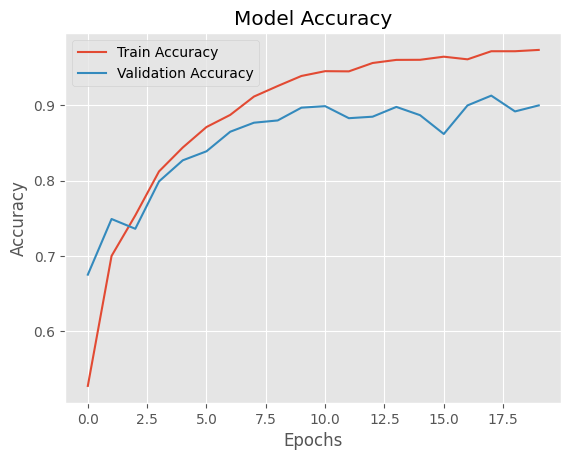

In [26]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# 14. Plot Training & Validation Loss

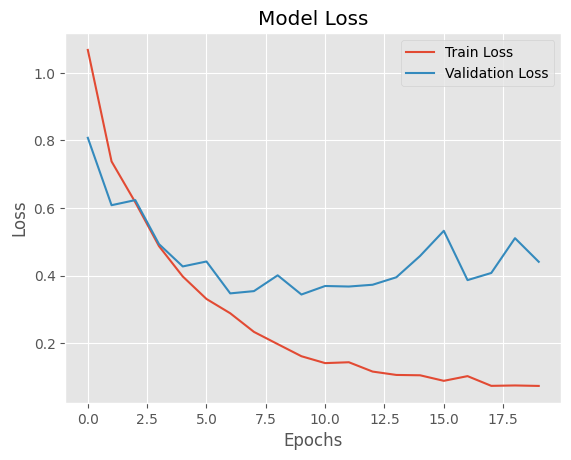

In [28]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# 15. Confusion Matrix

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define class labels
class_labels = ["Glioma", "Meningioma", "Notumor", "Pituitary" ]


In [38]:
# Load test dataset
test_generator.reset()  # Ensure the generator starts from the beginning
y_true = test_generator.classes  # True labels

# Get predictions
y_pred_probs = model.predict(test_generator)  # Probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


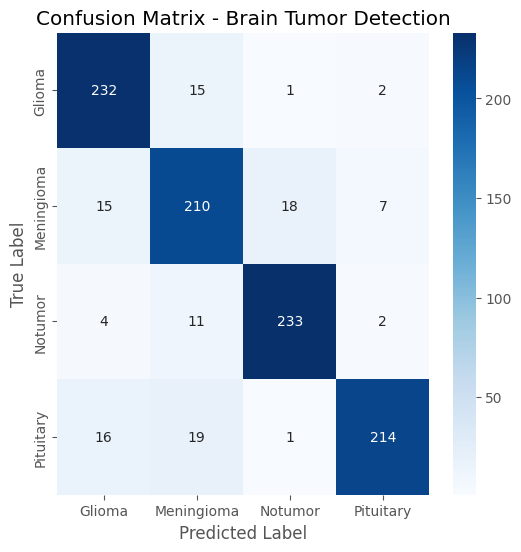

In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Brain Tumor Detection")
plt.show()

In [40]:
# Print precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:
               precision    recall  f1-score   support

      Glioma       0.87      0.93      0.90       250
  Meningioma       0.82      0.84      0.83       250
     Notumor       0.92      0.93      0.93       250
   Pituitary       0.95      0.86      0.90       250

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

